# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data for used car price prediction/Train_Set.csv')
df.head()

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995


In [4]:
df.shape

(290129, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

# EDA

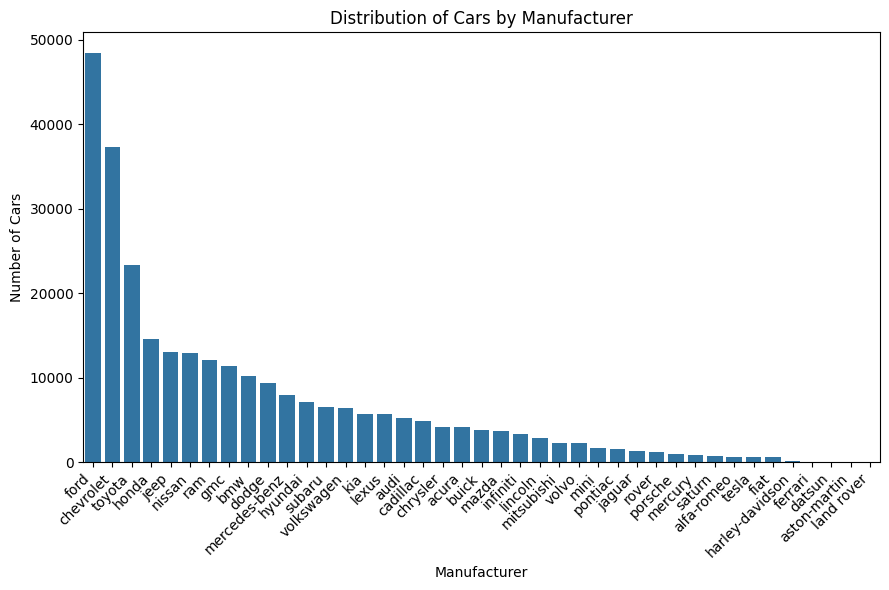

In [6]:
# Set up the plot using Seaborn
plt.figure(figsize=(9, 6))

# Distribution plot (count plot) using Seaborn
sns.countplot(data=df, x='manufacturer', order=df['manufacturer'].value_counts().index)

# Customize the plot
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars by Manufacturer')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

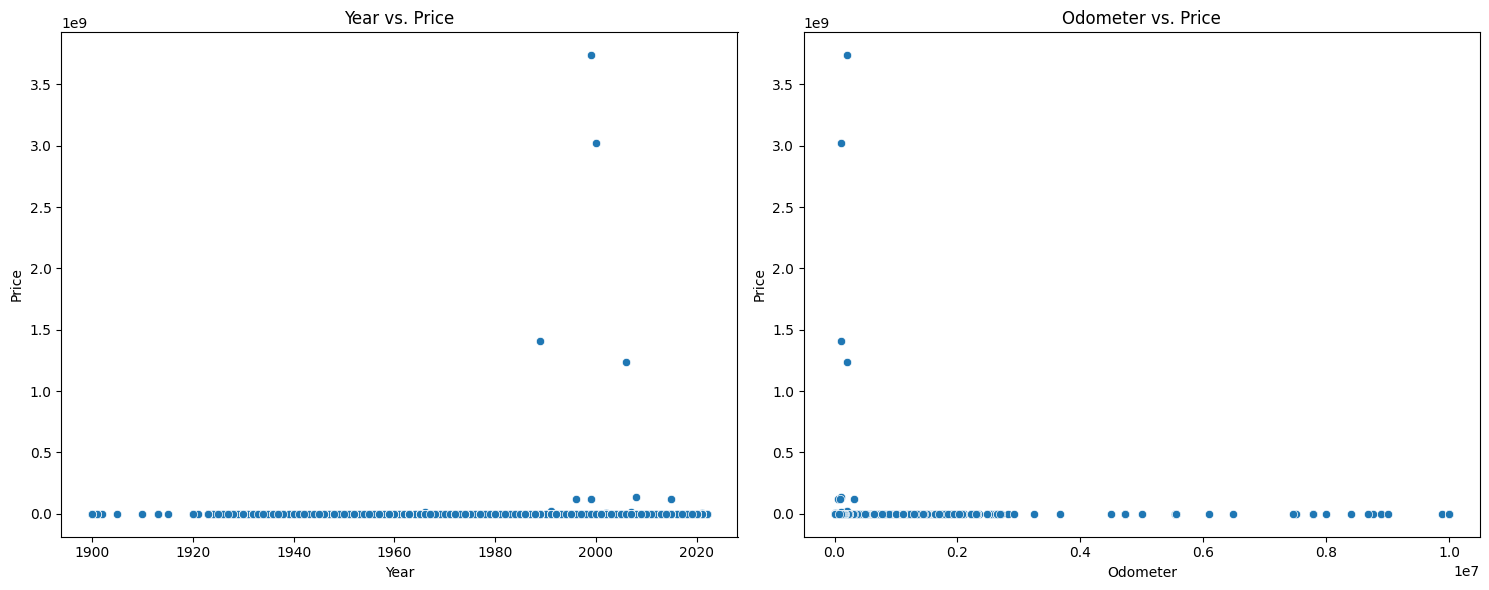

In [7]:
plt.figure(figsize=(15, 6))

# Subplot 1: Scatter plot for 'year' vs. 'price'
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='year', y='price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs. Price')

# Subplot 2: Scatter plot for 'odometer' vs. 'price'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='odometer', y='price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Odometer vs. Price')
plt.tight_layout()
plt.show()

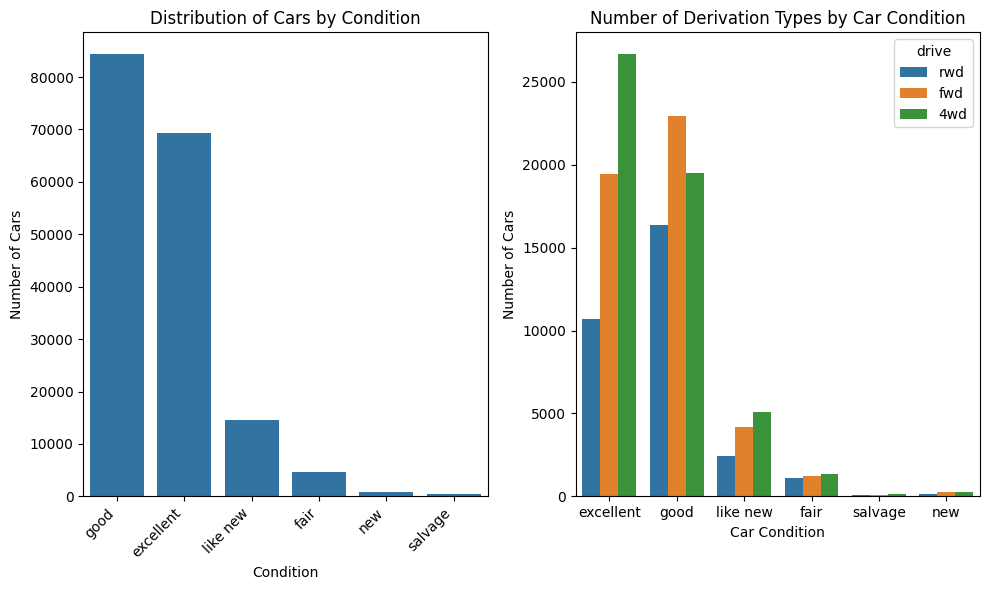

In [8]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

condition_counts = df['condition'].value_counts()
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plt.xlabel('Condition')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars by Condition')

plt.xticks(rotation=45, ha='right')

# Subplot 2: Scatter plot for 'odometer' vs. 'price'
plt.subplot(1, 2, 2)

# Distribution plot (count plot) using Seaborn
sns.countplot(data=df, x='condition', hue='drive')

# Customize the plot
plt.xlabel('Car Condition')
plt.ylabel('Number of Cars')
plt.title('Number of Derivation Types by Car Condition')

plt.tight_layout()
plt.show()

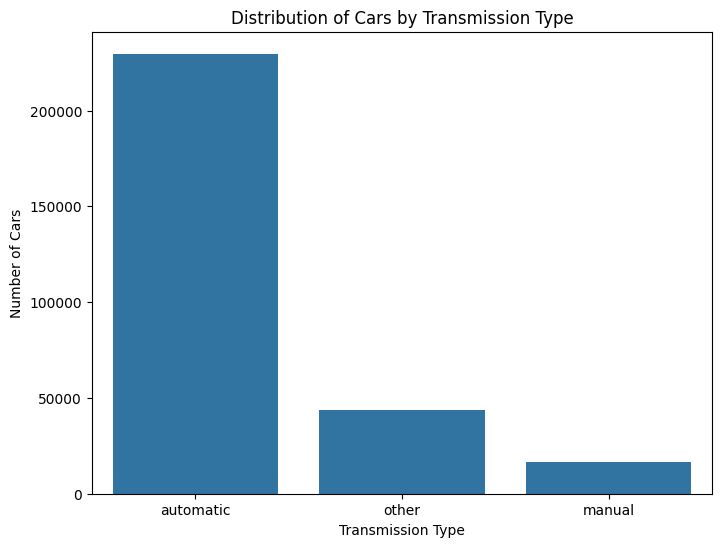

In [9]:
plt.figure(figsize=(8, 6))

# Distribution plot (count plot)
sns.countplot(data=df, x='transmission')

plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars by Transmission Type')

plt.show()

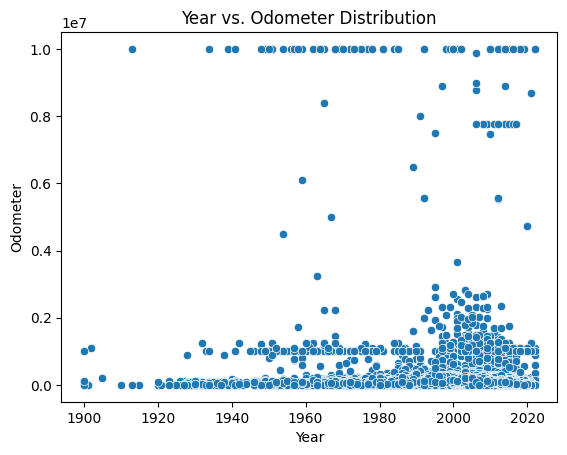

In [10]:
sns.scatterplot(data=df, x='year', y='odometer')
plt.xlabel('Year')
plt.ylabel('Odometer')
plt.title('Year vs. Odometer Distribution')
plt.show()


# Data Cleaning

## 1. Drop Irrelevant features

In [11]:
df = df.drop(columns = ['Unnamed: 0', 'id','size', 'state', 'lat', 'long', 'posting_date'])
df.head()

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
0,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,sedan,black,7995
1,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,SUV,black,14999
2,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,sedan,NaN,5995
3,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,SUV,NaN,0
4,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,SUV,silver,7995


In [12]:
# Number of null for each feature
df.isnull().sum()

,0
year,0
manufacturer,11342
model,0
condition,116104
cylinders,119300
fuel,1453
odometer,0
title_status,5066
transmission,0
drive,88087


## 2. Remove the Outliers

### - Year &  Odometer & Price columns

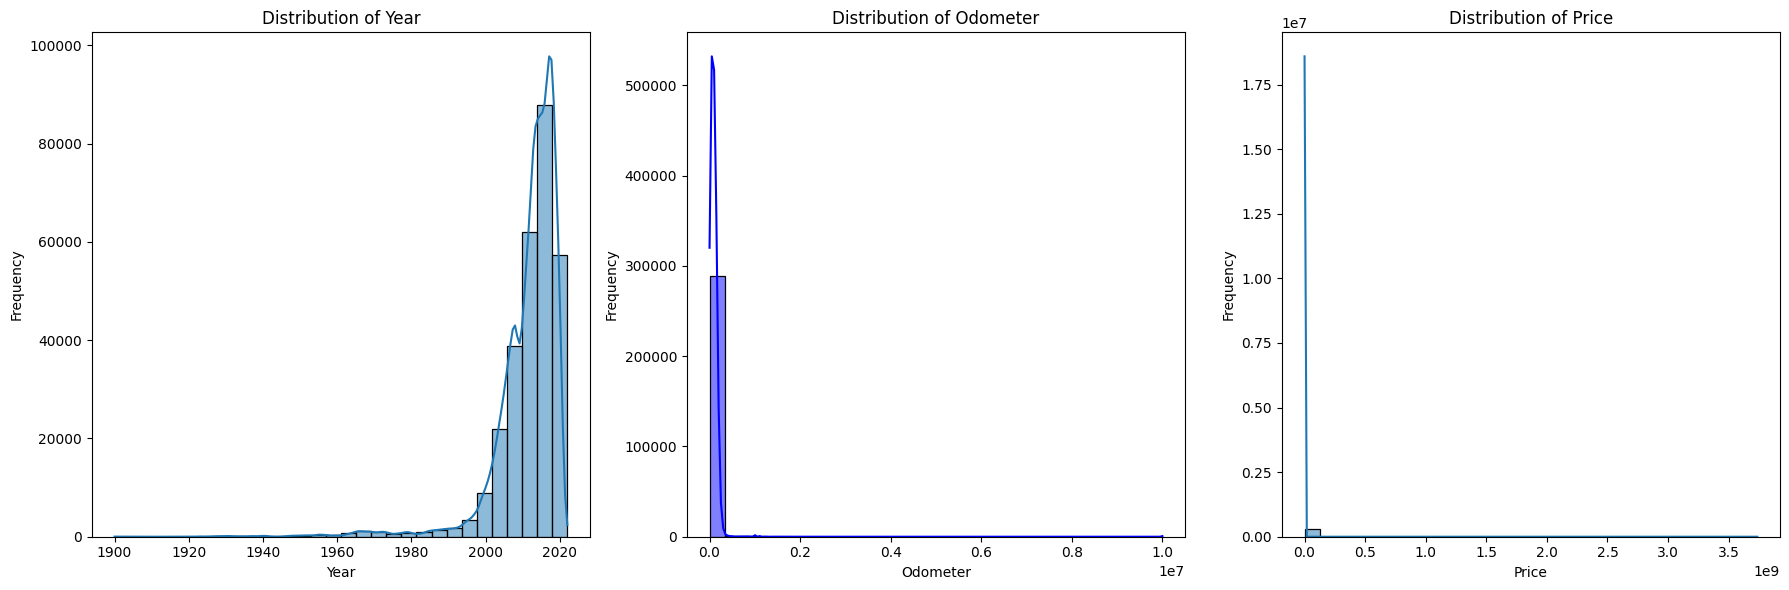

In [13]:
plt.figure(figsize=(18, 6))

# Subplot 1: Distribution plot for 'year'
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='year', kde=True, bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')


# Subplot 2: Distribution plot for 'odometer'
plt.subplot(1, 3, 2)
sns.histplot(df['odometer'], bins=30, kde=True, color='blue')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Distribution of Odometer')



# Subplot 3: Distribution plot for 'price'
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='price', kde=True, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

In [14]:
# Removing outliers for our analysis

# For 'year': Drop cars with model years before 2000
df = df[(df['year'] >= 2000)]

# For 'odometer': Drop cars with odometer value over 250,000 miles and lower than 50 miles.
# Assuming that values outside this range are uncommon or erroneous.
df = df[(df['odometer'] <= 200000) & (df['odometer'] >= 5000)]

# For 'price': Remove zero prices and drop rows with missing price values.
# Zero prices are likely incorrect, and missing prices are not useful for analysis.
df['price'] = df['price'].replace(0, np.NaN)
df.dropna(subset=['price'], inplace=True)

# For 'price': Drop cars with prices outside the range of $500 to $60,000.
# We are focusing on cars within a reasonable price range for analysis.
df = df[(df['price'] <= 50000) & (df['price']>=500) ]

In [15]:
print('Skewness for year:', df['year'].skew())
print('Skewness for odometer:', df['odometer'].skew())
print('Skewness for price:', df['price'].skew())

Skewness for year: -0.6405289864848649
Skewness for odometer: 0.209080092777222
Skewness for price: 0.5806358828955125


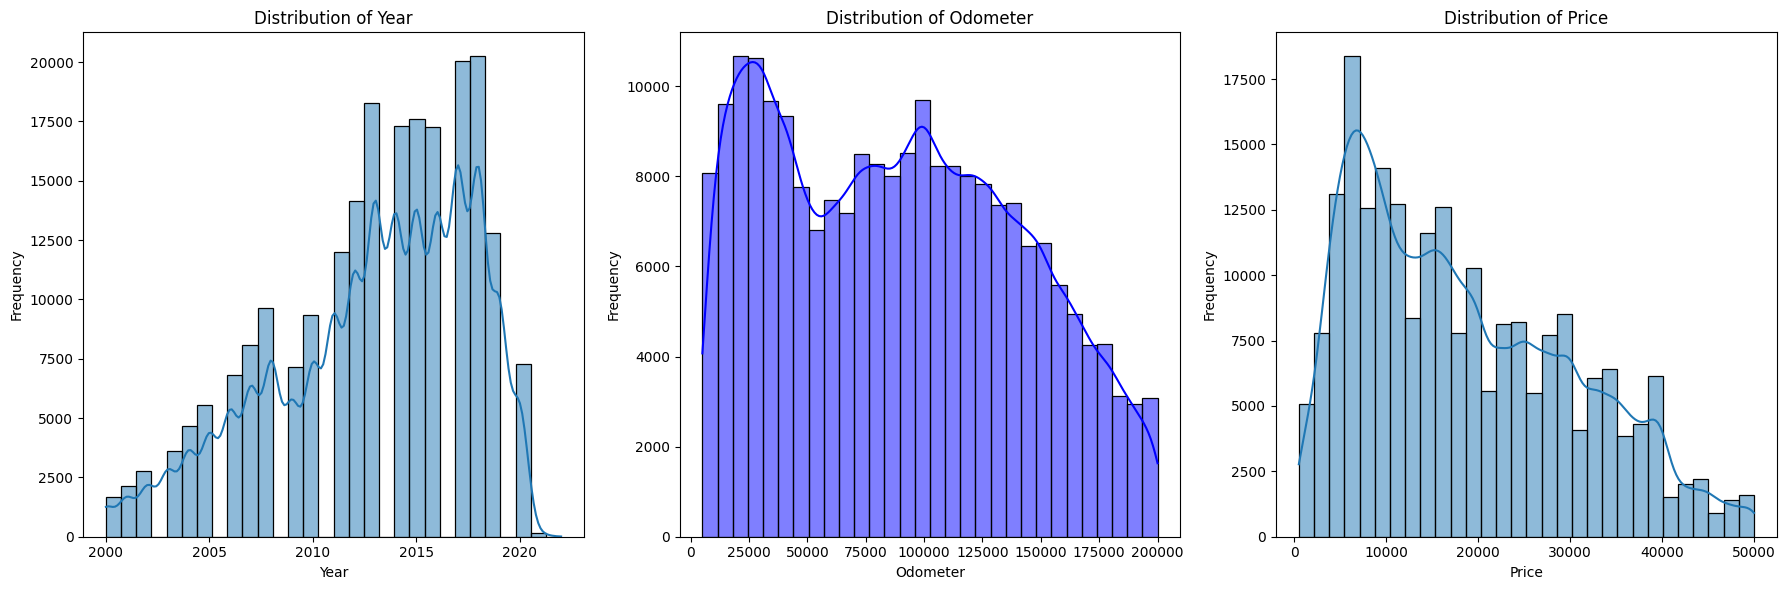

In [16]:
# Create a figure with three subplots in a row
plt.figure(figsize=(18, 6))

# Subplot 1: Distribution plot for 'year'
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='year', kde=True, bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')


# Subplot 2: Distribution plot for 'odometer'
plt.subplot(1, 3, 2)
sns.histplot(df['odometer'], bins=30, kde=True, color='blue')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Distribution of Odometer')

# Subplot 3: Distribution plot for 'price'
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='price', kde=True, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

In [17]:
df.shape

(218475, 13)

In [18]:
df.isnull().sum()

,0
year,0
manufacturer,5815
model,0
condition,81988
cylinders,89121
fuel,1276
odometer,0
title_status,3813
transmission,0
drive,65903


## 3. Handling categorical missing data

In [19]:
# condition
grouped = df.groupby(['condition', 'title_status'])

# Fill missing values within each group using forward fill
df['condition'] = grouped['condition'].fillna(method='ffill')
df['title_status'] = grouped['title_status'].fillna(method='ffill')
# fill nul with most frequnt
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['condition'] = imputer.fit_transform(df[['condition']].values.reshape(-1, 1)).flatten()
df['title_status'] = imputer.fit_transform(df[['title_status']].values.reshape(-1, 1)).flatten()

<ipython-input-19-f6f1af53f9f3>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['condition'] = grouped['condition'].fillna(method='ffill')
<ipython-input-19-f6f1af53f9f3>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['title_status'] = grouped['title_status'].fillna(method='ffill')


In [20]:
# cylinder
grouped = df.groupby(['cylinders', 'model'])

# Fill missing values within each group using forward fill
df['cylinders'] = grouped['cylinders'].fillna(method='ffill')

#
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['cylinders'] = imputer.fit_transform(df[['cylinders']].values.reshape(-1, 1)).flatten()


<ipython-input-20-d8cf74f7c61d>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cylinders'] = grouped['cylinders'].fillna(method='ffill')


In [21]:
# # type
model_type_map = df.dropna(subset=['type']).groupby('model')['type'].apply(lambda x: x.mode().iloc[0])

# Function to fill missing 'type' values based on the most frequent 'type' value for the 'model'
def fill_type(row):
    if pd.isnull(row['type']):
        return model_type_map.get(row['model'], None)
    else:
        return row['type']

# Apply the fill_type function to fill missing 'type' values
df['type'] = df.apply(lambda row: fill_type(row), axis=1)

# Fill remaining NaN values in 'type' with the mode of the entire 'type' column
type_mode = df['type'].mode().iloc[0]
df['type'].fillna(type_mode, inplace=True)


In [22]:
# drive
model_drive_map = df.dropna(subset=['drive']).groupby('model')['drive'].apply(lambda x: x.mode().iloc[0])

# Function to fill missing 'drive' values based on the most frequent 'drive' value for the 'model'
def fill_drive(row):
    if pd.isnull(row['drive']):
        return model_drive_map.get(row['model'], None)
    else:
        return row['drive']

# Apply the fill_drive function to fill missing 'drive' values
df['drive'] = df.apply(lambda row: fill_drive(row), axis=1)

# Fill remaining NaN values in 'drive' with the mode of the entire 'drive' column
drive_mode = df['drive'].mode().iloc[0]
df['drive'].fillna(drive_mode, inplace=True)

In [23]:
# Calculate the mean price for each 'paint_color' category (excluding NaN values)
mean_price_by_paint_color = df[df['paint_color'].notnull()].groupby('paint_color')['price'].mean()

# Function to fill missing 'paint_color' values based on the mean price values
def fill_paint_color_by_price(row):
    if pd.isnull(row['paint_color']):
        min_diff = float('inf')  # Initialize the minimum difference to infinity
        nearest_paint_color = None

        # Loop through each 'paint_color' and find the nearest one with the smallest difference in price
        for paint_color, avg_price in mean_price_by_paint_color.items():
            diff = abs(avg_price - row['price'])
            if diff < min_diff:
                min_diff = diff
                nearest_paint_color = paint_color

        return nearest_paint_color
    else:
        return row['paint_color']

# Apply the fill_paint_color_by_price function to fill missing 'paint_color' values
df['paint_color'] = df.apply(lambda row: fill_paint_color_by_price(row), axis=1)

In [24]:
df.isnull().sum()

,0
year,0
manufacturer,5815
model,0
condition,0
cylinders,0
fuel,1276
odometer,0
title_status,0
transmission,0
drive,0


<Axes: >

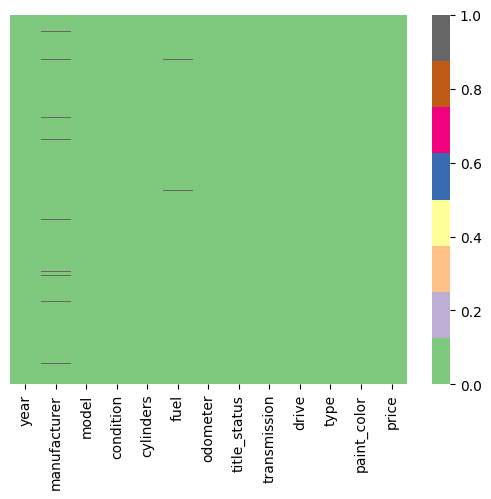

In [25]:
# heatmap to identify nulll values using graph
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='Accent')

# 2. Pre-processing

## Transforming categorical columns values into integer values

In [26]:
encode=preprocessing.LabelEncoder()
df=df.apply(encode.fit_transform)
df

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
1,8,6,6963,2,5,2,63811,0,0,0,0,0,3924
2,3,22,6925,2,5,2,65323,0,0,1,9,7,991
4,8,37,12608,0,3,2,54476,0,0,0,0,9,1526
5,10,12,7908,2,5,2,60295,0,0,0,8,11,5073
6,15,29,11883,2,6,2,24381,0,0,0,0,3,4216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290122,10,7,5644,2,3,4,20195,0,2,2,7,8,9669
290125,13,16,13391,2,5,2,44745,0,0,0,0,0,1785
290126,13,40,2910,0,3,2,35801,0,0,1,12,7,1305
290127,9,19,16235,2,5,2,42191,0,0,0,0,8,647


## Scaling Dataset

In [27]:
#scaling numerical data

norm = StandardScaler()
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))

In [28]:
df

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,price
1,-1.018050,6,-0.470074,2,5,2,1.497795,0,0,0,0,0,3924
2,-2.059568,22,-0.478228,2,5,2,1.571584,0,0,1,9,7,991
4,-1.018050,37,0.741312,0,3,2,1.042229,0,0,0,0,9,1526
5,-0.601442,12,-0.267282,2,5,2,1.326208,0,0,0,8,11,5073
6,0.440076,29,0.585731,2,6,2,-0.426465,0,0,0,0,3,4216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290122,-0.601442,7,-0.753124,2,3,4,-0.630749,0,2,2,7,8,9669
290125,0.023469,16,0.909339,2,5,2,0.567338,0,0,0,0,0,1785
290126,0.023469,40,-1.339825,0,3,2,0.130853,0,0,1,12,7,1305
290127,-0.809746,19,1.519646,2,5,2,0.442698,0,0,0,0,8,647


## Test set preparation for prediction

### Cleaning

In [30]:
df_test = pd.read_csv('/content/drive/MyDrive/Data for used car price prediction/Test-Set.csv')
df_id = df_test['id']
df_test = df_test.drop(columns = ['Unnamed: 0', 'id', 'size', 'state', 'lat', 'long', 'posting_date'])

In [31]:
df_test.isnull().sum()

,0
year,0
manufacturer,4853
model,0
condition,49819
cylinders,51371
fuel,645
odometer,0
title_status,2209
transmission,0
drive,37772


In [34]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_test['manufacturer'] = imputer.fit_transform(df_test[['manufacturer']].values.reshape(-1, 1)).flatten()
df_test['fuel'] = imputer.fit_transform(df_test[['fuel']].values.reshape(-1, 1)).flatten()

# # fill na with realted coulmn
# grouped = df_test.groupby(['manufacturer', 'model'])

# # Fill missing values within each group using forward fill
# df_test['manufacturer'] = grouped['manufacturer'].fillna(method='ffill')


In [36]:
# # # cond and  title
# grouped = df_test.groupby(['condition', 'title_status'])

# # # Fill missing values within each group using forward fill
# # df_test['condition'] = grouped['condition'].fillna(method='ffill')
# # df_test['title_status'] = grouped['title_status'].fillna(method='ffill')
# fill nul with most frequnt
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_test['condition'] = imputer.fit_transform(df_test[['condition']].values.reshape(-1, 1)).flatten()
df_test['title_status'] = imputer.fit_transform(df_test[['title_status']].values.reshape(-1, 1)).flatten()

In [38]:
# # cylinder
# grouped = df_test.groupby(['cylinders', 'model'])

# # Fill missing values within each group using forward fill
# df_test['cylinders'] = grouped['cylinders'].fillna(method='ffill')

# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# df_test['cylinders'] = imputer.fit_transform(df_test[['cylinders']].values.reshape(-1, 1)).flatten()

imputer = SimpleImputer(strategy='most_frequent')
df_test[['cylinders', 'model']] = imputer.fit_transform(df_test[['cylinders', 'model']])

In [39]:
# # type
model_type_map = df_test.dropna(subset=['type']).groupby('model')['type'].apply(lambda x: x.mode().iloc[0])

# Function to fill missing 'type' values based on the most frequent 'type' value for the 'model'
def fill_type(row):
    if pd.isnull(row['type']):
        return model_type_map.get(row['model'], None)
    else:
        return row['type']

# Apply the fill_type function to fill missing 'type' values
df_test['type'] = df_test.apply(lambda row: fill_type(row), axis=1)

# Fill remaining NaN values in 'type' with the mode of the entire 'type' column
type_mode = df_test['type'].mode().iloc[0]
df_test['type'].fillna(type_mode, inplace=True)

# imputer = SimpleImputer(strategy='most_frequent')
# df_test[['type', 'model']] = imputer.fit_transform(df_test[['type', 'model']])

In [40]:
# # drive
model_drive_map = df_test.dropna(subset=['drive']).groupby('model')['drive'].apply(lambda x: x.mode().iloc[0])

# Function to fill missing 'drive' values based on the most frequent 'drive' value for the 'model'
def fill_drive(row):
    if pd.isnull(row['drive']):
        return model_drive_map.get(row['model'], None)
    else:
        return row['drive']

# Apply the fill_drive function to fill missing 'drive' values
df_test['drive'] = df_test.apply(lambda row: fill_drive(row), axis=1)

# Fill remaining NaN values in 'drive' with the mode of the entire 'drive' column
drive_mode = df_test['drive'].mode().iloc[0]
df_test['drive'].fillna(drive_mode, inplace=True)

########################
def fill_with_mode(series):
    mode_values = series.mode()
    return mode_values.iloc[0] if not mode_values.empty else None

df['type'] = df.groupby('model')['type'].transform(fill_with_mode)
df['type'] = df['type'].fillna('other')

# imputer = SimpleImputer(strategy='most_frequent')
# df_test[['drive', 'model']] = imputer.fit_transform(df_test[['drive', 'model']])

In [42]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_test['paint_color'] = imputer.fit_transform(df_test[['paint_color']].values.reshape(-1, 1)).flatten()


In [43]:
df_test.isnull().sum()

,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0
transmission,0
drive,0


### Pre-Processing

In [44]:
encode_test=preprocessing.LabelEncoder()
df_test=df_test.apply(encode_test.fit_transform)
df_test

#scaling numerical data

norm_test = StandardScaler()
df_test['odometer'] = norm_test.fit_transform(np.array(df_test['odometer']).reshape(-1,1))
df_test['year'] = norm_test.fit_transform(np.array(df_test['year']).reshape(-1,1))
df_test['model'] = norm_test.fit_transform(np.array(df_test['model']).reshape(-1,1))

In [45]:
df_test

,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,0.726207,16,-0.830517,2,3,2,-1.097965,0,0,1,9,10
1,0.616735,6,-0.655041,2,5,2,-0.828248,0,2,0,9,8
2,-0.587455,38,0.961355,2,5,2,1.278762,0,0,1,5,5
3,0.507263,29,0.570662,2,5,4,-1.085682,0,2,0,0,10
4,0.616735,3,-1.208762,2,5,2,-1.202372,0,0,0,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...
124336,0.397791,33,-1.705985,2,5,0,0.704780,0,0,2,10,10
124337,-0.477983,30,0.471792,2,5,2,1.103407,0,0,0,9,10
124338,0.397791,10,-0.608359,0,3,2,0.087935,0,0,1,9,10
124339,-1.134814,7,-1.809404,2,5,2,0.928692,0,0,0,10,10


# 3. Modeling

In [46]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X= df.drop('price',axis=1)
y= df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(174780, 12) (174780,)
(43695, 12) (43695,)


## 3.1 Random Forest

In [47]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

rmse_rf = round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 2)
print('Root Mean Squared Error:', rmse_rf)

Root Mean Squared Error: 884.12


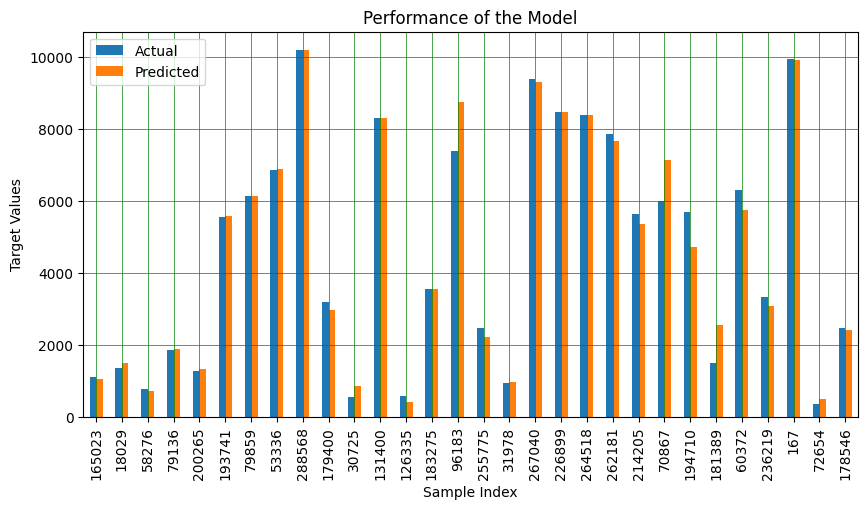

In [48]:
# Create a DataFrame with Actual and Predicted values
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
df_check = df_check.head(30)

# Plot the Actual vs. Predicted values using a bar plot
df_check.plot(kind='bar', figsize=(10, 5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of the Model')
plt.ylabel('Target Values')
plt.xlabel('Sample Index')
plt.show()

In [49]:
predictions = random_forest.predict(df_test)

# Create a new DataFrame to store the predictions with 'id' column
predictions_df = pd.DataFrame({'id': df_id, 'Target': predictions})

# Save the predictions to a new CSV file
predictions_df.to_csv('C:\\Users\\user\\Desktop\\AI Training with Tahaluf\\competetion\\predictions_randomforest.csv', index=False)

## 3.2 Adaboost

In [50]:
adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=25),
    n_estimators=100, learning_rate=0.1
)

adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)

rmse_ab = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ab)), 2)
print('Root Mean Squared Error:', rmse_ab)

Root Mean Squared Error: 868.74


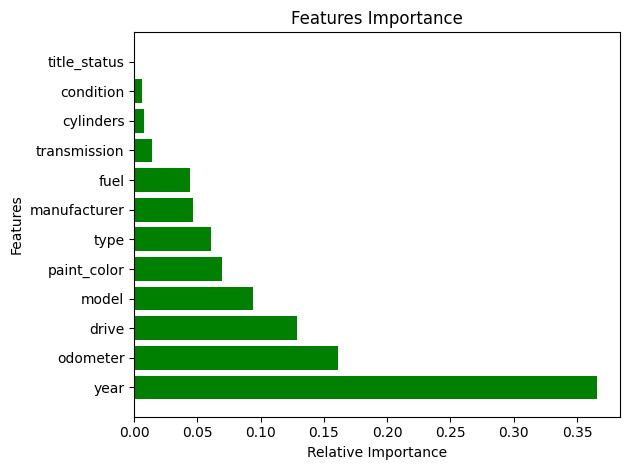

In [51]:
importances=adaboost.feature_importances_
features=X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
# plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show()

In [52]:
predictions = adaboost.predict(df_test)

# Create a new DataFrame to store the predictions with 'id' column
predictions_df = pd.DataFrame({'id': df_id, 'Predicted_Price': predictions})

# Save the predictions to a new CSV file
predictions_df.to_csv('C:\\Users\\user\\Desktop\\AI Training with Tahaluf\\competetion\\predictions_ab.csv', index=False)

## 3.3 XGBOOST

In [53]:
xgboost = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 25, n_estimators = 100)

xgboost.fit(X_train,y_train)
y_pred_xgb = xgboost.predict(X_test)
rmse_xgb = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)), 2)
print('Root Mean Squared Error:', rmse_xgb)

Root Mean Squared Error: 977.58


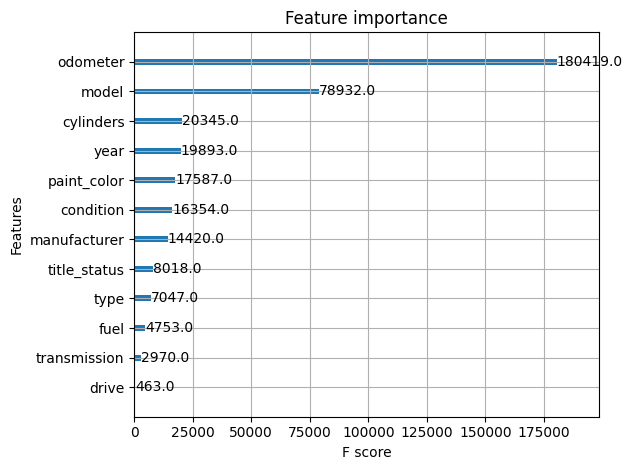

In [54]:
import xgboost as xgb
xgb.plot_importance(xgboost)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
# plt.savefig('XGBoost-Features-Importance.jpg')
plt.show()

In [55]:
predictions = xgboost.predict(df_test)

# Create a new DataFrame to store the predictions with 'id' column
predictions_df = pd.DataFrame({'id': df_id, 'Target': predictions})

# Save the predictions to a new CSV file
predictions_df.to_csv('C:\\Users\\user\\Desktop\\AI Training with Tahaluf\\competetion\\predictions_xgb.csv', index=False)

## 3.2 KNN

In [56]:
knn = KNeighborsRegressor(n_neighbors = 3)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

rmse_knn = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)), 2)
print('Root Mean Squared Error:', rmse_knn)

Root Mean Squared Error: 1228.28


In [57]:
predictions = knn.predict(df_test)

# Create a new DataFrame to store the predictions with 'id' column
predictions_df = pd.DataFrame({'id': df_id, 'Target': predictions})

# Save the predictions to a new CSV file
predictions_df.to_csv('C:\\Users\\user\\Desktop\\AI Training with Tahaluf\\competetion\\predictions_knn.csv', index=False)

# RMSE Comparison for Different Models

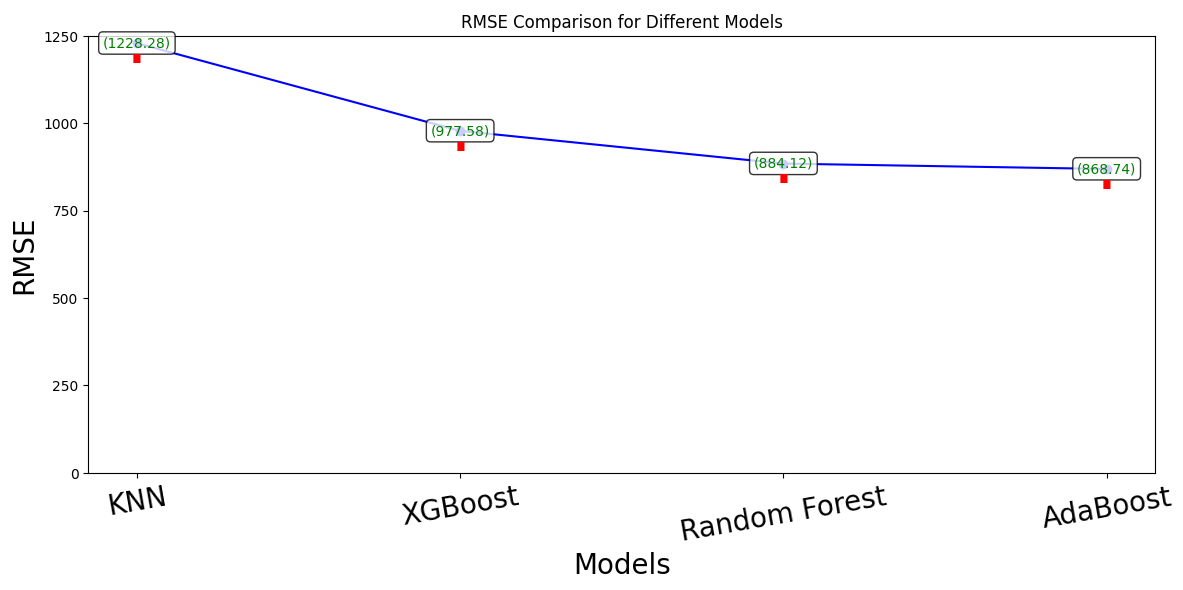

In [58]:
# Sort the models and their RMSE values in descending order
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'KNN']
rmse_values = [rmse_rf, rmse_ab, rmse_xgb, rmse_knn]
sorted_models, sorted_rmse_values = zip(*sorted(zip(models, rmse_values), key=lambda x: x[1], reverse=True))

# Create the figure
plt.figure(figsize=(12, 6))
plt.plot(sorted_models, sorted_rmse_values, marker='o', linestyle='-', color='blue')

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.yticks(range(0,1500,250))
plt.xticks(range(len(sorted_models)), sorted_models, fontsize=20, rotation=10)

# Set the x and y axis labels and title
plt.xlabel("Models", fontsize=20)
plt.ylabel("RMSE", fontsize=20)
plt.title("RMSE Comparison for Different Models")

# Add text annotations for RMSE values and red dots
for a, b in enumerate(sorted_rmse_values):
    val = f"({b:.2f})"
    plt.text(a, b + 0.5, val, horizontalalignment='center', verticalalignment='center', color='green', bbox=props)
    plt.text(a, b + 0.3, '.', horizontalalignment='center', verticalalignment='center', color='red', fontsize=50)

# Adjust the layout and save the figure
plt.tight_layout()
# plt.savefig('new_Assumption/RMSE Comparison for Different Models.jpg')
plt.show()